In [0]:
# As usual, a bit of setup
from __future__ import print_function
import time, os, json
import numpy as np
import matplotlib.pyplot as plt
import nltk

from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.rnn_layers import *
from cs231n.captioning_solver import CaptioningSolver
from cs231n.classifiers.rnn import CaptioningRNN
from cs231n.coco_utils import load_coco_data, sample_coco_minibatch, decode_captions
from cs231n.image_utils import image_from_url

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [0]:
enable_PCA = True

# Load COCO data from disk; this returns a dictionary
# We'll work with dimensionality-reduced features for this notebook, but feel
# free to experiment with the original features by changing the flag below.
data = load_coco_data(pca_features=enable_PCA)

# Print out all the keys and values from the data dictionary
for k, v in data.items():
    if type(v) == np.ndarray:
        print(k, type(v), v.shape, v.dtype)
    else:
        print(k, type(v), len(v))

In [0]:
def BLEU_score(gt_caption, sample_caption):
    """
    gt_caption: string, ground-truth caption
    sample_caption: string, your model's predicted caption
    Returns unigram BLEU score.
    """
    reference = [x for x in gt_caption.split(' ') 
                 if ('<END>' not in x and '<START>' not in x and '<UNK>' not in x)]
    hypothesis = [x for x in sample_caption.split(' ') 
                  if ('<END>' not in x and '<START>' not in x and '<UNK>' not in x)]
    BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis, weights = [1])
    return BLEUscore

def evaluate_model(model):
    """
    model: CaptioningRNN model
    Prints unigram BLEU score averaged over 1000 training and val examples.
    """
    BLEUscores = {}
    for split in ['train', 'val']:
        minibatch = sample_coco_minibatch(data, split=split, batch_size=1000)
        gt_captions, features, urls = minibatch
        gt_captions = decode_captions(gt_captions, data['idx_to_word'])

        sample_captions = model.sample(features)
        sample_captions = decode_captions(sample_captions, data['idx_to_word'])

        total_score = 0.0
        for gt_caption, sample_caption, url in zip(gt_captions, sample_captions, urls):
            total_score += BLEU_score(gt_caption, sample_caption)

        BLEUscores[split] = total_score / len(sample_captions)

    for split in BLEUscores:
        print('Average BLEU score for %s: %f' % (split, BLEUscores[split]))

(Iteration 1 / 585) loss: 75.026991
(Iteration 11 / 585) loss: 55.676091
(Iteration 21 / 585) loss: 48.848976
(Iteration 31 / 585) loss: 45.058067
(Iteration 41 / 585) loss: 42.505531
(Iteration 51 / 585) loss: 38.904480
(Iteration 61 / 585) loss: 38.542219
(Iteration 71 / 585) loss: 37.298039
(Iteration 81 / 585) loss: 35.966706
(Iteration 91 / 585) loss: 36.765397
(Iteration 101 / 585) loss: 32.830161
(Iteration 111 / 585) loss: 33.430491
(Iteration 121 / 585) loss: 33.234870
(Iteration 131 / 585) loss: 34.193425
(Iteration 141 / 585) loss: 31.274002
(Iteration 151 / 585) loss: 30.930439
(Iteration 161 / 585) loss: 30.903586
(Iteration 171 / 585) loss: 29.768351
(Iteration 181 / 585) loss: 30.924226
(Iteration 191 / 585) loss: 31.148088
(Iteration 201 / 585) loss: 30.996755
(Iteration 211 / 585) loss: 30.181153
(Iteration 221 / 585) loss: 29.072456
(Iteration 231 / 585) loss: 27.371498
(Iteration 241 / 585) loss: 29.329122
(Iteration 251 / 585) loss: 28.075443
(Iteration 261 / 585) l

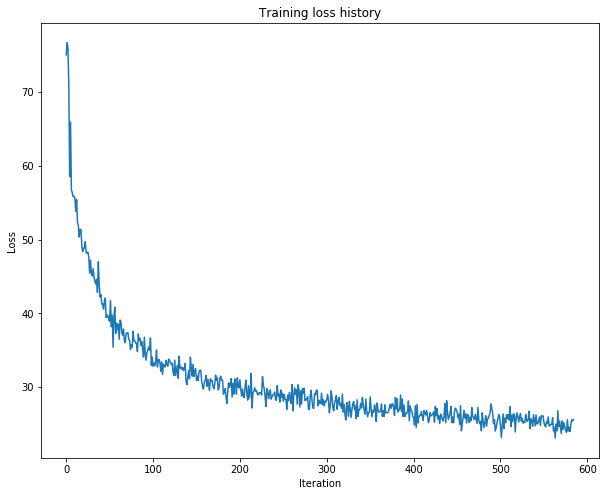

In [15]:
np.random.seed(231)
my_data = load_coco_data(max_train=25000, pca_features=enable_PCA)

my_lstm_model = CaptioningRNN(
          cell_type='lstm',
          word_to_idx=my_data['word_to_idx'],
          input_dim=my_data['train_features'].shape[1],
          hidden_dim=512,
          wordvec_dim=256,
        )

my_lstm_solver = CaptioningSolver(my_lstm_model, my_data,
           update_rule='adam',
           num_epochs=3,
           batch_size=128,
           optim_config={
             'learning_rate': 5e-3,
           },
           lr_decay=0.95,
           verbose=True, print_every=10,
         )

my_lstm_solver.train()

# Plot the training losses
plt.plot(my_lstm_solver.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()

In [17]:
my_lstm_solver.train()

(Iteration 1 / 585) loss: 25.795926
(Iteration 11 / 585) loss: 23.832439
(Iteration 21 / 585) loss: 24.046382
(Iteration 31 / 585) loss: 23.901144
(Iteration 41 / 585) loss: 23.938254
(Iteration 51 / 585) loss: 23.731246
(Iteration 61 / 585) loss: 23.630522
(Iteration 71 / 585) loss: 23.838357
(Iteration 81 / 585) loss: 23.697402
(Iteration 91 / 585) loss: 23.724039
(Iteration 101 / 585) loss: 22.990490
(Iteration 111 / 585) loss: 24.748578
(Iteration 121 / 585) loss: 23.333434
(Iteration 131 / 585) loss: 25.234987
(Iteration 141 / 585) loss: 23.324452
(Iteration 151 / 585) loss: 25.115228
(Iteration 161 / 585) loss: 23.949237
(Iteration 171 / 585) loss: 23.255166
(Iteration 181 / 585) loss: 23.090668
(Iteration 191 / 585) loss: 22.991409
(Iteration 201 / 585) loss: 21.457049
(Iteration 211 / 585) loss: 22.512872
(Iteration 221 / 585) loss: 23.251845
(Iteration 231 / 585) loss: 22.065603
(Iteration 241 / 585) loss: 22.298050
(Iteration 251 / 585) loss: 22.684208
(Iteration 261 / 585) l

In [19]:
my_lstm_solver.train()
evaluate_model(my_lstm_model)

(Iteration 1 / 585) loss: 20.381503
(Iteration 11 / 585) loss: 20.448205
(Iteration 21 / 585) loss: 21.324784
(Iteration 31 / 585) loss: 21.609079
(Iteration 41 / 585) loss: 21.580309
(Iteration 51 / 585) loss: 20.903560
(Iteration 61 / 585) loss: 20.007571
(Iteration 71 / 585) loss: 20.725409
(Iteration 81 / 585) loss: 18.594530
(Iteration 91 / 585) loss: 20.317822
(Iteration 101 / 585) loss: 19.378359
(Iteration 111 / 585) loss: 20.556345
(Iteration 121 / 585) loss: 20.003218
(Iteration 131 / 585) loss: 20.837640
(Iteration 141 / 585) loss: 20.797092
(Iteration 151 / 585) loss: 20.237911
(Iteration 161 / 585) loss: 19.655144
(Iteration 171 / 585) loss: 20.924835
(Iteration 181 / 585) loss: 18.762693
(Iteration 191 / 585) loss: 20.585936
(Iteration 201 / 585) loss: 19.442318
(Iteration 211 / 585) loss: 18.371262
(Iteration 221 / 585) loss: 19.566462
(Iteration 231 / 585) loss: 20.415031
(Iteration 241 / 585) loss: 20.370510
(Iteration 251 / 585) loss: 19.418221
(Iteration 261 / 585) l